In [1]:
import onnxruntime as ort

In [2]:
model_path = "/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx"

In [3]:
session = ort.InferenceSession(model_path)

In [4]:
input_name = session.get_inputs()[0].name  # First input
input_shape = session.get_inputs()[0].shape  # Input shape
input_type = session.get_inputs()[0].type  # Data type

print("Input name  :", input_name)
print("Input shape :", input_shape)
print("Input type  :", input_type)

# Get output details
output0_name = session.get_outputs()[0].name  # First output
output0_shape = session.get_outputs()[0].shape  # Output shape
output0_type = session.get_outputs()[0].type  # Data type
output1_name = session.get_outputs()[1].name  # Second output
output1_shape = session.get_outputs()[1].shape  # Output shape
output1_type = session.get_outputs()[1].type  # Data type

print("Output0 name  :", output0_name)
print("Output0 shape :", output0_shape)
print("Output0 type  :", output0_type)
print("Output1 name  :", output1_name)
print("Output1 shape :", output1_shape)
print("Output1 type  :", output1_type)

Input name  : images
Input shape : [1, 3, 640, 640]
Input type  : tensor(float)
Output0 name  : output0
Output0 shape : [1, 37, 8400]
Output0 type  : tensor(float)
Output1 name  : output1
Output1 shape : [1, 32, 160, 160]
Output1 type  : tensor(float)


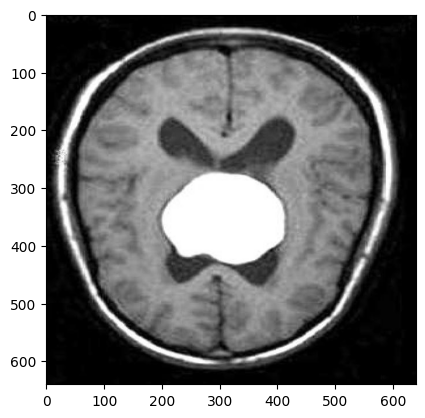

In [5]:
import numpy as np
import os 
import sys 
from PIL import Image
import matplotlib.pyplot as plt

sys.path.append("../")

from modelacc import *

image_path = get_sample_test_image_path()
image = Image.open(image_path)
image = image.resize((640, 640))
plt.imshow(image)


In [53]:
import cv2
import torch

image = cv2.imread(image_path)

In [49]:
inname = [i.name for i in session.get_inputs()]

In [44]:
original_height, original_width = image.shape[:2]

print(f"original height: {original_height}, original width: {original_width}")

model_input_height = original_height
model_input_width = original_width

original height: 640, original width: 640


In [ ]:
resized_image = cv2.resize(image, (model_input_width, model_input_height))
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
rgb_image = np.transpose(rgb_image, (2, 0, 1))

In [52]:
outputs = session.run(['nms_output_with_scaled_boxes_and_masks', 'final_masks', 'input_image_mask'], inp)

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (tensor(uint8)) , expected: (tensor(float))

In [10]:
# convert to tensor
output0_t = torch.tensor(output0)
output1_t = torch.tensor(output1)

print(f"Output0 shape: {output0_t.shape}")
print(f"Output1 shape: {output1_t.shape}")

Output0 shape: torch.Size([1, 37, 8400])
Output1 shape: torch.Size([1, 32, 160, 160])


In [13]:
# compare with YOLO
from ultralytics import YOLO

model = YOLO("/home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx")

model_mask_tensor = model.predict(image_path)[0].masks.data

Loading /home/crinstaniev/Dev/BrainTumorTRTAcc/runs/segment/train/weights/best.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime session with CUDA. Falling back to CPU...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 /home/crinstaniev/Dev/BrainTumorTRTAcc/data/test/images/y174_jpg.rf.af2d4a156ea4e4f7ca7c9f6112d4dd02.jpg: 640x640 1 object, 58.4ms
Speed: 1.4ms preprocess, 58.4ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 640)


In [26]:
model_result = model.predict(image_path)[0]


image 1/1 /home/crinstaniev/Dev/BrainTumorTRTAcc/data/test/images/y174_jpg.rf.af2d4a156ea4e4f7ca7c9f6112d4dd02.jpg: 640x640 1 object, 74.7ms
Speed: 13.5ms preprocess, 74.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
